In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
cancer=pd.read_csv('cancer.csv')

In [4]:
cancer

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
cancer[cancer.id.duplicated()].id

Series([], Name: id, dtype: int64)

In [10]:
cancer['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [12]:
cancer.drop('Unnamed: 32',axis=1,inplace=True)

In [13]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:>

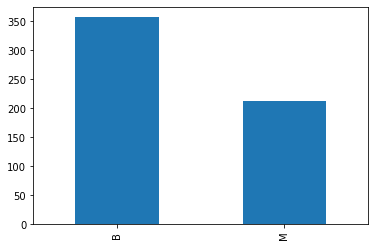

In [16]:
cancer.diagnosis.value_counts().plot.bar()

In [18]:
cancer['diagnosis']=cancer.diagnosis.map({'B':0,'M':1})

In [19]:
cancer.drop('id',axis=1,inplace=True)

In [23]:
train,test=train_test_split(cancer,test_size=0.3)

In [42]:
corr_mat=train.corr()
cols=corr_mat.nlargest(10,'diagnosis')['diagnosis'].index

In [48]:
corr_mat

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.734801      0.431953        0.748339   
radius_mean               0.734801     1.000000      0.316399        0.997674   
texture_mean              0.431953     0.316399      1.000000        0.324045   
perimeter_mean            0.748339     0.997674      0.324045        1.000000   
area_mean                 0.716165     0.987979      0.313730        0.986263   
smoothness_mean           0.345564     0.165386      0.022526        0.203420   
compactness_mean          0.583922     0.491605      0.250770        0.545443   
concavity_mean            0.717427     0.697396      0.337969        0.738629   
concave points_mean       0.776475     0.827233      0.309967        0.856943   
symmetry_mean             0.319103     0.148008      0.089323        0.186408   
fractal_dimension_mean   -0.022339    -0.312845     -0.037584       -0.259996   
radius_se                 0.583698     0.684015      0.257580        0.693968   
texture_se                0.005239    -0.112972      0.419472       -0.104393   
perimeter_se              0.566296     0.667467      0.259298        0.685574   
area_se                   0.575966     0.750360      0.238917        0.755810   
smoothness_se            -0.066496    -0.256376      0.048462       -0.237767   
compactness_se            0.317436     0.192902      0.210804        0.238769   
concavity_se              0.371044     0.298423      0.242817        0.339406   
concave points_se         0.425092     0.389048      0.176799        0.422648   
symmetry_se               0.015081    -0.080109      0.026448       -0.056314   
fractal_dimension_se      0.103505    -0.049413      0.090042       -0.008746   
radius_worst              0.777111     0.970740      0.343535        0.970643   
texture_worst             0.473247     0.299050      0.921507        0.306535   
perimeter_worst           0.786167     0.965433      0.350904        0.971165   
area_worst                0.739906     0.942419      0.335440        0.942040   
smoothness_worst          0.396852     0.100716      0.096564        0.133258   
compactness_worst         0.579123     0.395836      0.280515        0.441013   
concavity_worst           0.675948     0.542152      0.337208        0.582014   
concave points_worst      0.780572     0.736822      0.300614        0.767046   
symmetry_worst            0.405726     0.181672      0.110129        0.210601   
fractal_dimension_worst   0.306253    -0.000091      0.139939        0.046222   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.716165         0.345564          0.583922   
radius_mean               0.987979         0.165386          0.491605   
texture_mean              0.313730         0.022526          0.250770   
perimeter_mean            0.986263         0.203420          0.545443   
area_mean                 1.000000         0.173881          0.479436   
smoothness_mean           0.173881         1.000000          0.657448   
compactness_mean          0.479436         0.657448          1.000000   
concavity_mean            0.700485         0.511569          0.886146   
concave points_mean       0.828011         0.541473          0.821114   
symmetry_mean             0.149480         0.548280          0.620095   
fractal_dimension_mean   -0.288005         0.592623          0.577721   
radius_se                 0.733526         0.284766          0.463005   
texture_se               -0.081331         0.021181          0.018131   
perimeter_se              0.713622         0.284603          0.530984   
area_se                   0.807011         0.234717          0.427697   
smoothness_se            -0.200878         0.286005          0.093119   
compactness_se            0.187884         0.303031          0.739843   
concavity_se              0.295993         0.269744          0.687354   
concave points_se         0.374887         0.

In [43]:
train[cols]

diagnosis  perimeter_worst  concave points_worst  radius_worst  \
438          0           100.90               0.05890         15.63   
335          1           143.20               0.18270         20.99   
400          1           149.60               0.19640         20.80   
102          0            84.58               0.07431         13.34   
69           0            85.67               0.05882         13.46   
..         ...              ...                   ...           ...   
39           1           107.30               0.22580         15.53   
475          0            93.22               0.09783         14.09   
284          0            92.12               0.10170         13.90   
463          0            82.68               0.08288         12.77   
351          1           119.40               0.21350         17.36   

     concave points_mean  perimeter_mean  area_worst  radius_mean  \
438              0.02293           88.68       749.1        13.85   
335              0.09934          111.80      1362.0        17.06   
400              0.11980          124.40      1304.0        17.91   
102              0.01770           77.22       547.8        12.18   
69               0.02864           81.37       554.9        12.78   
..                   ...             ...         ...          ...   
39               0.05439           88.40       740.4        13.48   
475              0.03078           82.89       605.8        12.83   
284              0.03390           84.08       595.6        12.89   
463              0.01777           73.88       495.1        11.60   
351              0.12420          107.10       915.3        15.75   

     concavity_mean  area_mean  
438         0.01342      592.6  
335         0.15080      918.6  
400         0.31890      994.0  
102         0.02383      458.7  
69          0.03653      502.5  
..              ...        ...  
39          0.10630      559.2  
475         0.05835      506.9  
284         0.11150      516.6  
463         0.03367      412.7  
351         0.29140      758.6  

[398 rows x 10 columns]

In [44]:
train[cols].values

array([[0.000e+00, 1.009e+02, 5.890e-02, ..., 1.385e+01, 1.342e-02,
        5.926e+02],
       [1.000e+00, 1.432e+02, 1.827e-01, ..., 1.706e+01, 1.508e-01,
        9.186e+02],
       [1.000e+00, 1.496e+02, 1.964e-01, ..., 1.791e+01, 3.189e-01,
        9.940e+02],
       ...,
       [0.000e+00, 9.212e+01, 1.017e-01, ..., 1.289e+01, 1.115e-01,
        5.166e+02],
       [0.000e+00, 8.268e+01, 8.288e-02, ..., 1.160e+01, 3.367e-02,
        4.127e+02],
       [1.000e+00, 1.194e+02, 2.135e-01, ..., 1.575e+01, 2.914e-01,
        7.586e+02]])

In [46]:
np.corrcoef(train[cols].values.T)

array([[1.        , 0.78616738, 0.78057151, 0.77711058, 0.77647492,
        0.74833941, 0.73990636, 0.73480099, 0.71742742, 0.71616499],
       [0.78616738, 1.        , 0.81121566, 0.99311752, 0.86483918,
        0.97116548, 0.97601499, 0.96543349, 0.75076287, 0.95621306],
       [0.78057151, 0.81121566, 1.        , 0.77680994, 0.91488868,
        0.76704595, 0.7359649 , 0.73682242, 0.87884813, 0.71174639],
       [0.77711058, 0.99311752, 0.77680994, 1.        , 0.83705673,
        0.97064343, 0.98524836, 0.97074035, 0.70597171, 0.96249628],
       [0.77647492, 0.86483918, 0.91488868, 0.83705673, 1.        ,
        0.85694312, 0.81761418, 0.82723281, 0.93283702, 0.82801133],
       [0.74833941, 0.97116548, 0.76704595, 0.97064343, 0.85694312,
        1.        , 0.94203961, 0.99767355, 0.73862885, 0.98626343],
       [0.73990636, 0.97601499, 0.7359649 , 0.98524836, 0.81761418,
        0.94203961, 1.        , 0.94241923, 0.68741838, 0.95645409],
       [0.73480099, 0.96543349, 0.7368224

In [49]:
train[cols].corr()

diagnosis  perimeter_worst  concave points_worst  \
diagnosis              1.000000         0.786167              0.780572   
perimeter_worst        0.786167         1.000000              0.811216   
concave points_worst   0.780572         0.811216              1.000000   
radius_worst           0.777111         0.993118              0.776810   
concave points_mean    0.776475         0.864839              0.914889   
perimeter_mean         0.748339         0.971165              0.767046   
area_worst             0.739906         0.976015              0.735965   
radius_mean            0.734801         0.965433              0.736822   
concavity_mean         0.717427         0.750763              0.878848   
area_mean              0.716165         0.956213              0.711746   

                      radius_worst  concave points_mean  perimeter_mean  \
diagnosis                 0.777111             0.776475        0.748339   
perimeter_worst           0.993118             0.864839        0.971165   
concave points_worst      0.776810             0.914889        0.767046   
radius_worst              1.000000             0.837057        0.970643   
concave points_mean       0.837057             1.000000        0.856943   
perimeter_mean            0.970643             0.856943        1.000000   
area_worst                0.985248             0.817614        0.942040   
radius_mean               0.970740             0.827233        0.997674   
concavity_mean            0.705972             0.932837        0.738629   
area_mean                 0.962496             0.828011        0.986263   

                      area_worst  radius_mean  concavity_mean  area_mean  
diagnosis               0.739906     0.734801        0.717427   0.716165  
perimeter_worst         0.976015     0.965433        0.750763   0.956213  
concave points_worst    0.735965     0.736822        0.878848   0.711746  
radius_worst            0.985248     0.970740        0.705972   0.962496  
concave points_mean     0.817614     0.827233        0.932837   0.828011  
perimeter_mean          0.942040     0.997674        0.738629   0.986263  
area_worst              1.000000     0.942419        0.687418   0.956454  
radius_mean             0.942419     1.000000        0.697396   0.987979  
concavity_mean          0.687418     0.697396        1.000000   0.700485  
area_mean               0.956454     0.987979        0.700485   1.000000

<AxesSubplot:>

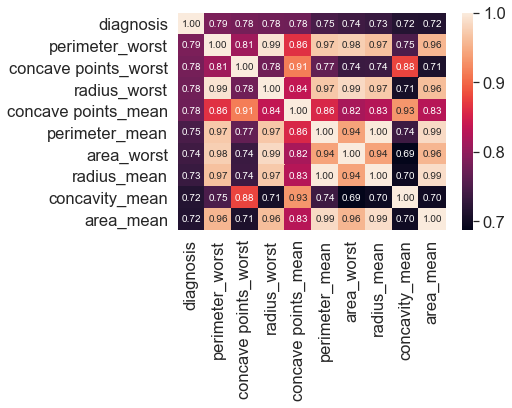

In [59]:
sns.set(font_scale=1.5)
sns.heatmap(train[cols].corr(),cbar=True,annot=True,annot_kws={'size': 10},fmt='.2f')

In [60]:
features = [
    'diagnosis',
    'perimeter_se',
    'perimeter_worst',
    'concavity_worst',
    'concave points_worst',
    'texture_worst',
    'smoothness_worst',
    'symmetry_worst'
]

In [67]:
cm=train.corr()[features]

In [84]:
cm[cm.index=='diagnosis'].T.sort_values(by='diagnosis',ascending=False)

diagnosis
diagnosis              1.000000
perimeter_worst        0.786167
concave points_worst   0.780572
concavity_worst        0.675948
perimeter_se           0.566296
texture_worst          0.473247
symmetry_worst         0.405726
smoothness_worst       0.396852

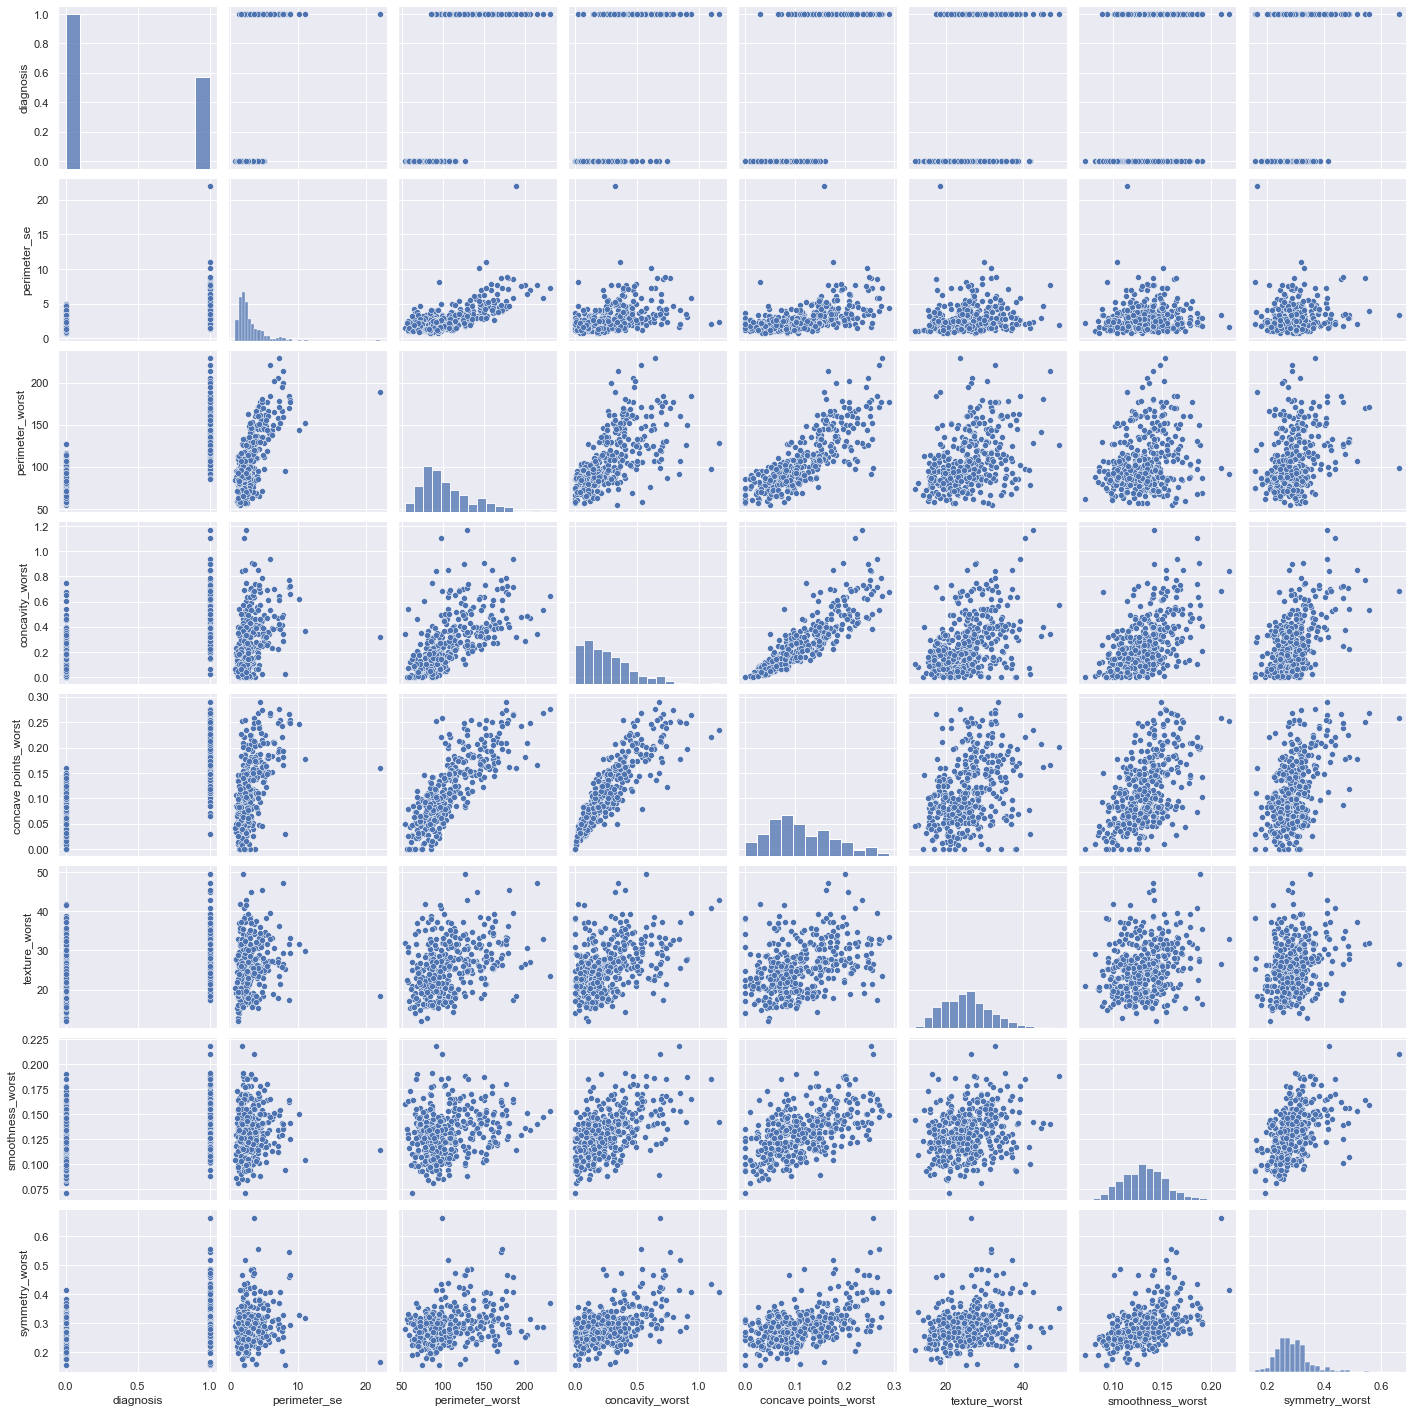

In [86]:
sns.set()
sns.pairplot(train[features])
plt.show()

In [104]:
### Brakujące dane
total_column_nulls=train.isnull().sum().sort_values(ascending=False)
null_percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total_column_nulls,null_percent],axis=1,keys=['Total_nulls','Null_percent'])
missing_values.head()

Total_nulls  Null_percent
fractal_dimension_worst            0           0.0
area_se                            0           0.0
radius_mean                        0           0.0
texture_mean                       0           0.0
perimeter_mean                     0           0.0

<AxesSubplot:xlabel='texture_mean'>

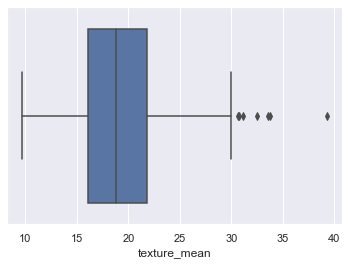

In [105]:
sns.boxplot(data=train,x='texture_mean')

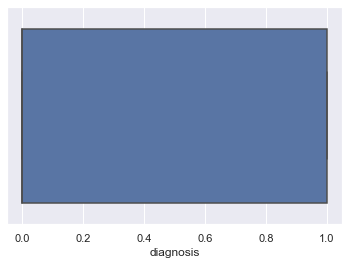

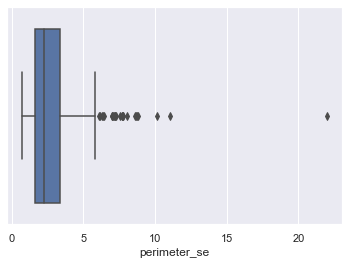

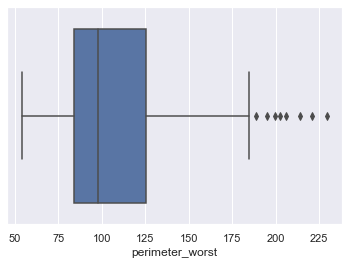

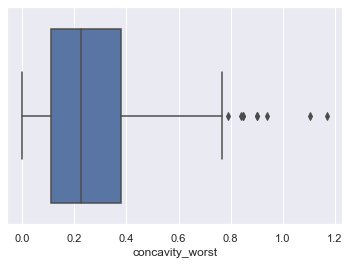

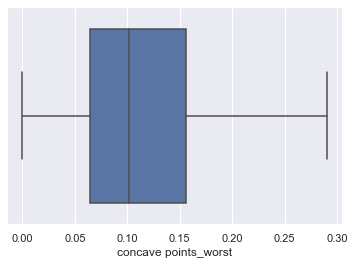

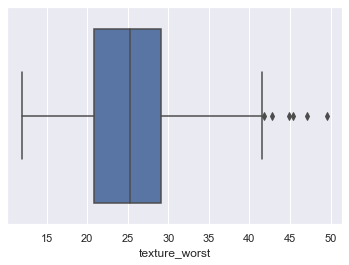

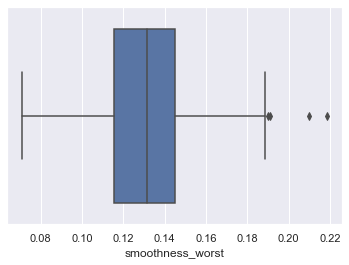

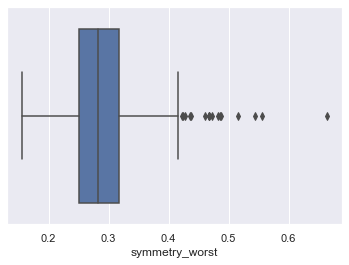

In [109]:
for feature in features:
    sns.boxplot(data=train,x=train[feature])
    plt.show()

In [111]:
train=train[train['perimeter_se']<15]

In [114]:
train=train[train['symmetry_worst']<0.6]

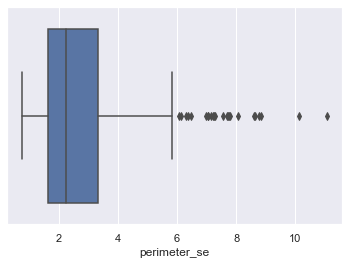

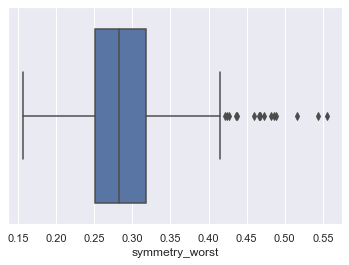

In [115]:
sns.boxplot(x=train.perimeter_se)
plt.show()
sns.boxplot(x=train.symmetry_worst)
plt.show()

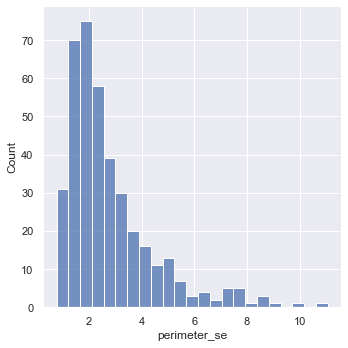

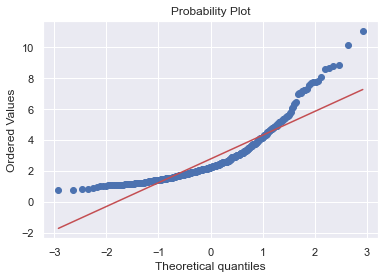

In [129]:
sns.displot(train.perimeter_se)
fig=plt.figure()
res=stats.probplot(train.perimeter_se,plot=plt)

In [140]:
predictors=features[2:]

In [141]:
X_train=train[predictors]
X_test=test[predictors]

y_train=train.diagnosis
y_test=test.diagnosis

In [142]:
model=LogisticRegression(max_iter=200)

In [143]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [144]:
### Mean accuracy score
model.score(X_test,y_test)

0.935672514619883

In [146]:
predictions=model.predict(X_test)

In [148]:
### Mean accuracy score
metrics.accuracy_score(y_test,predictions)

0.935672514619883

In [150]:
metrics.roc_auc_score(y_test,predictions)

0.9329001168224299

In [153]:
y_test.value_counts()

0    107
1     64
Name: diagnosis, dtype: int64

In [159]:
pd.Series(predictions).value_counts()

0    106
1     65
dtype: int64

In [151]:
metrics.confusion_matrix(y_test,predictions)

array([[101,   6],
       [  5,  59]], dtype=int64)

In [152]:
### TP/P, gdzie P=TP+FP. Udział poprawnych pozytywnych kalifikacji wśród wszystkich poprawnych kwalifikacji
metrics.precision_score(y_test,predictions)

0.9076923076923077

In [161]:
## 59= predicted positive and real positive TP, 65=all predicted positives
59/65

0.9076923076923077

In [162]:
### TP/RealP, gdzie RealP=TP+FN. Udział pozytywnie zakwalifikowanych wśród wszystkich rzeczywistych pozytywnych
metrics.recall_score(y_test,predictions)

0.921875

In [163]:
### 59 = TP, predicted positive and real positive, 64 =all real positives
59/64

0.921875

In [178]:
model.coef_[0]

array([0.2074535 , 1.6882884 , 0.62653918, 0.27914907, 0.41217886,
       0.46954796])

In [175]:
len(model.coef_[0])

6

In [167]:
predictors

['perimeter_worst',
 'concavity_worst',
 'concave points_worst',
 'texture_worst',
 'smoothness_worst',
 'symmetry_worst']

In [180]:
coef_dict={predictor:coef for predictor,coef in zip(predictors,model.coef_[0])}

In [186]:
pd.Series(coef_dict).sort_values(ascending=False)

concavity_worst         1.688288
concave points_worst    0.626539
symmetry_worst          0.469548
smoothness_worst        0.412179
texture_worst           0.279149
perimeter_worst         0.207453
dtype: float64

In [187]:
model.intercept_

array([-30.88738637])